In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [3]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [5]:

data = pd.read_csv(r'C:\Users\Mir Sahib\Desktop\Project-Andromeda\Dataset\1st_Level_Feature_Extracted\1st_Level_Dataset.csv')



In [6]:
data.head()


,RangeX,RangeY,RangeZ,MeanX,MeanY,MeanZ,VarX,VarY,VarZ,SkewX,SkewY,SkewZ,Label
0,10.000000,4.000000,12.000000,3.264151,47.345912,30.503145,10.781377,0.620387,9.101143,0.684459,1.147650,-1.072247,1
1,14.333333,5.000000,-1.666667,6.861635,49.119497,9.371069,3.138088,4.927020,13.055180,1.504449,-0.800700,1.018865,1
2,25.000000,5.666667,87.333333,7.182390,40.937107,47.553459,35.289585,176.654325,1819.094102,1.363479,-1.024615,0.394305,1
3,11.333333,46.000000,-3.000000,5.283019,90.742138,9.408805,17.230173,0.510027,52.279419,-0.013016,0.268856,0.149232,1
4,9.000000,46.333333,3.000000,4.283019,91.459119,12.716981,9.485938,0.319608,39.146315,-0.068285,-0.461924,1.044800,1


In [8]:
X = data.drop('Label',axis=1)
y = data['Label']
X.shape,y.shape

((2835, 12), (2835,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape


((2268, 12), (567, 12))

## Step forward feature selection

In [10]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.5s finished

[2020-03-18 04:39:30] Features: 1/7 -- score: 0.11196393942822808[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    5.8s finished

[2020-03-18 04:39:36] Features: 2/7 -- score: 0.23669842906435784[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.8s finished

[2020-03-18 04:39:42] Features: 3/7 -- score: 0.3459717989837073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    5.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    6.5s finished

[2020-03-18 04:39:49] Features: 4/7 -- score: 0.4143

In [11]:
sfs.k_feature_names_


('RangeY', 'RangeZ', 'MeanX', 'MeanY', 'MeanZ', 'VarX', 'VarZ')

In [12]:
sfs.k_feature_idx_


(1, 2, 3, 4, 5, 6, 8)

In [13]:
sfs.k_score_

0.5069892150589239

In [23]:
sfsDF = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfsDF

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.11672473867595819, 0.10701754385964912, 0.1...",0.111964,"(RangeY,)",0.0147326,0.00919074,0.00530628
2,"(1, 4)","[0.25609756097560976, 0.22456140350877193, 0.2...",0.236698,"(RangeY, MeanY)",0.0209029,0.01304,0.00752866
3,"(1, 4, 5)","[0.37282229965156793, 0.3456140350877193, 0.33...",0.345972,"(RangeY, MeanY, MeanZ)",0.0266611,0.0166322,0.00960261
4,"(1, 3, 4, 5)","[0.42857142857142855, 0.4263157894736842, 0.41...",0.414314,"(RangeY, MeanX, MeanY, MeanZ)",0.0287602,0.0179417,0.0103586
5,"(1, 3, 4, 5, 6)","[0.4616724738675958, 0.47719298245614034, 0.46...",0.462465,"(RangeY, MeanX, MeanY, MeanZ, VarX)",0.0155226,0.00968355,0.0055908
6,"(1, 3, 4, 5, 6, 8)","[0.48257839721254353, 0.5280701754385965, 0.50...",0.499534,"(RangeY, MeanX, MeanY, MeanZ, VarX, VarZ)",0.0288737,0.0180125,0.0103995
7,"(1, 2, 3, 4, 5, 6, 8)","[0.5, 0.531578947368421, 0.5070921985815603, 0...",0.506989,"(RangeY, RangeZ, MeanX, MeanY, MeanZ, VarX, VarZ)",0.0249227,0.0155477,0.00897649


In [33]:
sfsDF.to_csv(r'C:\Users\Mir Sahib\Desktop\Project-Andromeda\Metric\1st_level_SFS.csv')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25010e5a448>)

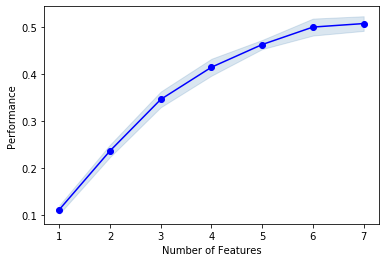

In [24]:
plot_sfs(sfs.get_metric_dict(), kind='std_dev')

## Step Backward feature selection

In [25]:
sbs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   11.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   11.2s finished

[2020-03-18 04:51:35] Features: 11/1 -- score: 0.5206225215347657[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.7s finished

[2020-03-18 04:51:44] Features: 10/1 -- score: 0.5228411502940018[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.1s finished

[2020-03-18 04:51:52] Features: 9/1 -- score: 0.5228462063955946[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    5.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    6.6s finished

[2020-03-18 04:51:59] Features: 8/1 -- score: 0.5237

In [26]:
sbs.k_score_


0.523728683085503

In [27]:
sbs.k_feature_names_


('RangeY', 'RangeZ', 'MeanX', 'MeanY', 'MeanZ', 'VarX', 'VarY', 'VarZ')

In [29]:
sbsDF = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
sbsDF

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.5313588850174216, 0.5368421052631579, 0.510...",0.518817,"(RangeX, RangeY, RangeZ, MeanX, MeanY, MeanZ, ...",0.0259754,0.0162044,0.00935564
11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)","[0.5156794425087108, 0.5578947368421052, 0.501...",0.520623,"(RangeX, RangeY, RangeZ, MeanX, MeanY, MeanZ, ...",0.0353988,0.0220831,0.0127497
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10)","[0.5365853658536586, 0.5245614035087719, 0.519...",0.522841,"(RangeX, RangeY, RangeZ, MeanX, MeanY, MeanZ, ...",0.0149959,0.00935499,0.0054011
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.5348432055749129, 0.5350877192982456, 0.496...",0.522846,"(RangeX, RangeY, RangeZ, MeanX, MeanY, MeanZ, ...",0.0252816,0.0157716,0.00910575
8,"(1, 2, 3, 4, 5, 6, 7, 8)","[0.5261324041811847, 0.5368421052631579, 0.528...",0.523729,"(RangeY, RangeZ, MeanX, MeanY, MeanZ, VarX, Va...",0.0197236,0.0123043,0.0071039
7,"(1, 2, 3, 4, 5, 6, 8)","[0.5, 0.531578947368421, 0.5070921985815603, 0...",0.506989,"(RangeY, RangeZ, MeanX, MeanY, MeanZ, VarX, VarZ)",0.0249227,0.0155477,0.00897649
6,"(1, 3, 4, 5, 6, 8)","[0.48257839721254353, 0.5280701754385965, 0.50...",0.499534,"(RangeY, MeanX, MeanY, MeanZ, VarX, VarZ)",0.0288737,0.0180125,0.0103995
5,"(1, 3, 4, 5, 6)","[0.4616724738675958, 0.47719298245614034, 0.46...",0.462465,"(RangeY, MeanX, MeanY, MeanZ, VarX)",0.0155226,0.00968355,0.0055908
4,"(1, 3, 4, 5)","[0.42857142857142855, 0.4263157894736842, 0.41...",0.414314,"(RangeY, MeanX, MeanY, MeanZ)",0.0287602,0.0179417,0.0103586
3,"(1, 4, 5)","[0.37282229965156793, 0.3456140350877193, 0.33...",0.345972,"(RangeY, MeanY, MeanZ)",0.0266611,0.0166322,0.00960261


In [34]:
sbsDF.to_csv(r'C:\Users\Mir Sahib\Desktop\Project-Andromeda\Metric\1st_level_SBS.csv')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25010e59a88>)

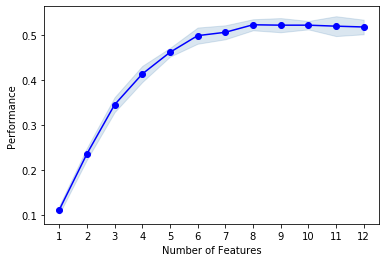

In [31]:
plot_sfs(sbs.get_metric_dict(), kind='std_dev')

## Exhaustive feature selection

In [35]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


In [36]:
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 4,
          max_features= 7,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(X_train, y_train)


Features: 3003/3003

In [22]:
help(efs)


Help on ExhaustiveFeatureSelector in module mlxtend.feature_selection.exhaustive_feature_selector object:

class ExhaustiveFeatureSelector(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin)
 |  ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True)
 |  
 |  Exhaustive Feature Selection for Classification and Regression.
 |     (new in v0.4.3)
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  min_features : int (default: 1)
 |      Minumum number of features to select
 |  max_features : int (default: 1)
 |      Maximum number of features to select
 |  print_progress : bool (default: True)
 |      Prints progress as the number of epochs
 |      to stderr.
 |  scoring : str, (default='accuracy')
 |      Scoring metric in {accuracy, f1, precision, recall, roc_auc}
 |      for classifiers,
 |      {'mean_absolute_error', 'm

In [37]:
efs.best_score_


1.0

In [38]:
efs.best_feature_names_


('RangeX', 'RangeY', 'RangeZ', 'MeanX')

In [39]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [41]:
pd.DataFrame.from_dict(efs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0, 1, 2, 3)",[1.0],1,"(RangeX, RangeY, RangeZ, MeanX)",NaN,0,NaN
1,"(0, 1, 2, 4)",[1.0],1,"(RangeX, RangeY, RangeZ, MeanY)",NaN,0,NaN
2,"(0, 1, 2, 5)",[1.0],1,"(RangeX, RangeY, RangeZ, MeanZ)",NaN,0,NaN
3,"(0, 1, 2, 6)",[1.0],1,"(RangeX, RangeY, RangeZ, VarX)",NaN,0,NaN
4,"(0, 1, 2, 7)",[1.0],1,"(RangeX, RangeY, RangeZ, VarY)",NaN,0,NaN
...,...,...,...,...,...,...,...
2998,"(4, 5, 6, 7, 9, 10, 11)",[1.0],1,"(MeanY, MeanZ, VarX, VarY, SkewX, SkewY, SkewZ)",NaN,0,NaN
2999,"(4, 5, 6, 8, 9, 10, 11)",[1.0],1,"(MeanY, MeanZ, VarX, VarZ, SkewX, SkewY, SkewZ)",NaN,0,NaN
3000,"(4, 5, 7, 8, 9, 10, 11)",[1.0],1,"(MeanY, MeanZ, VarY, VarZ, SkewX, SkewY, SkewZ)",NaN,0,NaN
3001,"(4, 6, 7, 8, 9, 10, 11)",[1.0],1,"(MeanY, VarX, VarY, VarZ, SkewX, SkewY, SkewZ)",NaN,0,NaN


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2501227a308>)

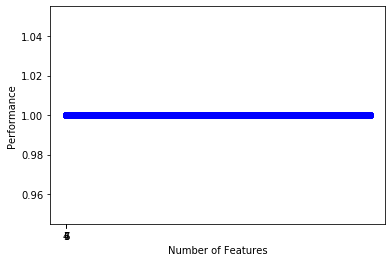

In [40]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')
